In [ ]:
Exercise_1.2_R_Charts

In [20]:
# Loading
library("readxl")
library(ggplot2)
library(dplyr)
# xls files
my_data <- read_excel("./obama-approval-ratings.xls")

In [21]:
print(my_data)

# A tibble: 13 x 4
   Issue                    Approve Disapprove  None
   <chr>                      <dbl>      <dbl> <dbl>
 1 Race Relations                52         38    10
 2 Education                     49         40    11
 3 Terrorism                     48         45     7
 4 Energy Policy                 47         42    11
 5 Foreign Affairs               44         48     8
 6 Environment                   43         51     6
 7 Situation in Iraq             41         53     6
 8 Taxes                         41         54     5
 9 Healthcare Policy             40         57     3
10 Economy                       38         59     3
11 Situation in Afghanistan      36         57     7
12 Federal Budget Deficit        31         64     5
13 Immigration                   29         62     9


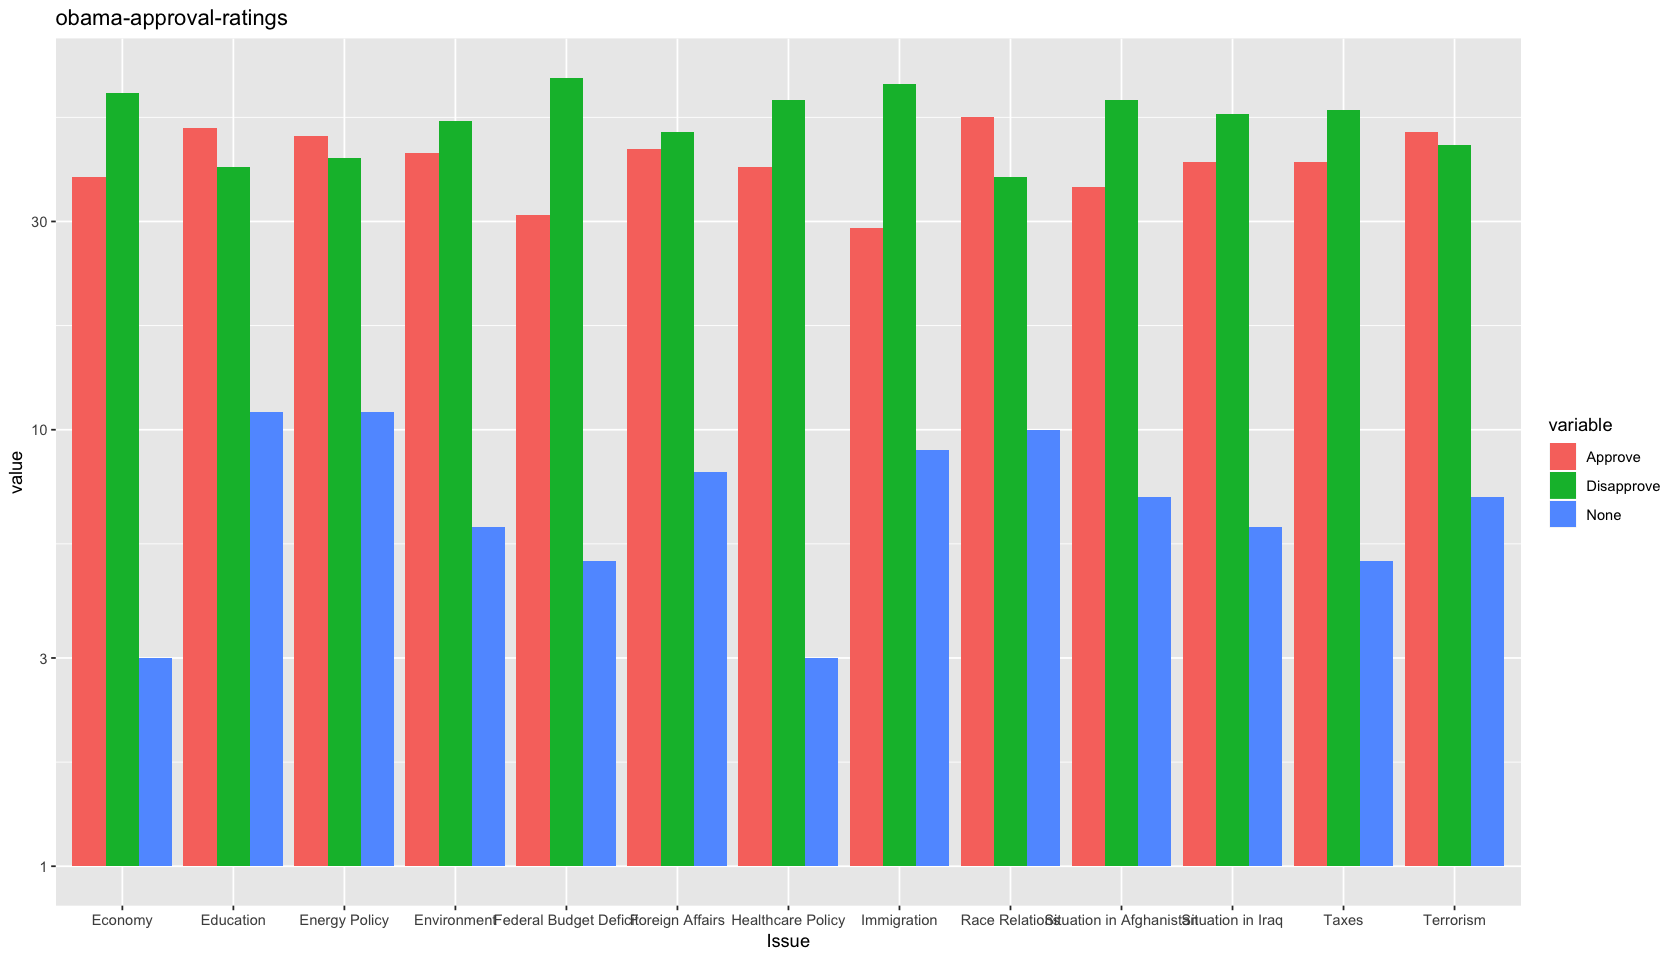

In [43]:
library(reshape2)
dfm <- melt(my_data[,c('Issue','Approve','Disapprove','None')],id.vars = 1)

options(repr.plot.width = 14, repr.plot.height = 8)

ggplot(dfm, mapping = aes(x=Issue, y=value)) +
 geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
    scale_y_log10() + ggtitle("Obama approval ratings")



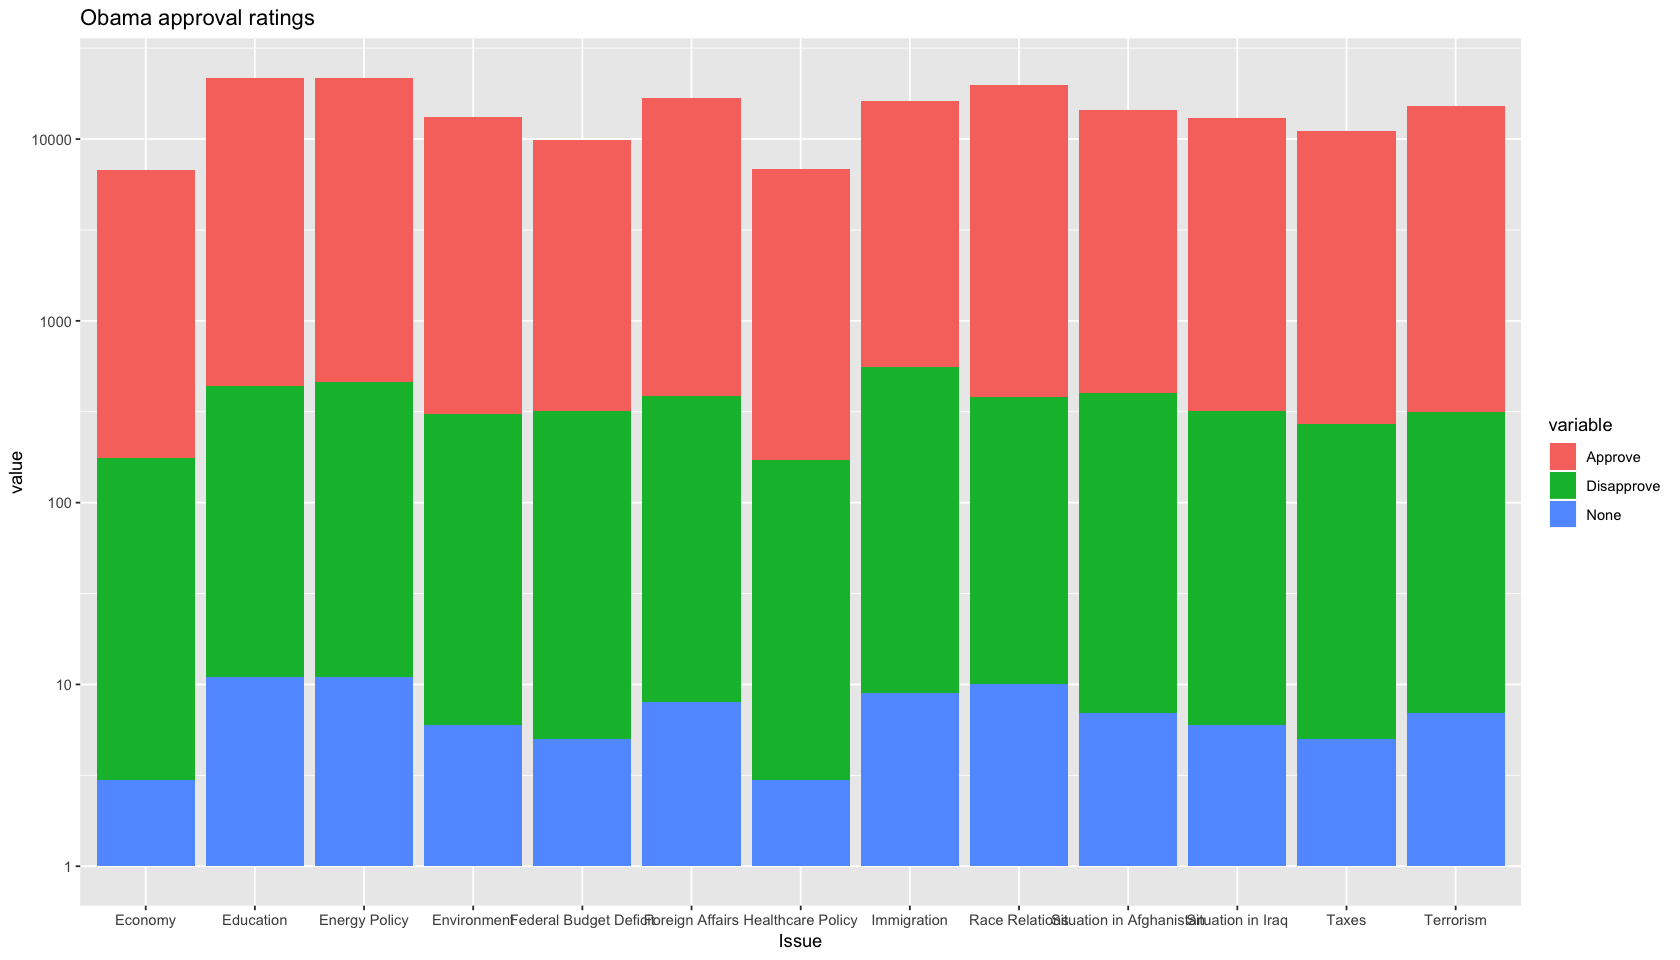

In [44]:
library(reshape2)
dfm <- melt(my_data[,c('Issue','Approve','Disapprove','None')],id.vars = 1)

#png(filename="obama-approval-ratings.png", width=600, height=600)

options(repr.plot.width = 14, repr.plot.height = 8)

ggplot(dfm, mapping = aes(x=Issue, y=value)) +
 geom_bar(aes(fill = variable),stat = "identity") + 
    scale_y_log10()+ ggtitle("Obama approval ratings")


In [45]:
my_data <- read_excel("./hotdog-contest-winners.xlsm")

In [46]:
print(my_data)

# A tibble: 31 x 5
    Year Winner                       `Dogs eaten` Country       `New record`
   <dbl> <chr>                               <dbl> <chr>                <dbl>
 1  1980 Paul Siederman & Joe Baldini          9.1 United States            0
 2  1981 Thomas DeBerry                       11   United States            0
 3  1982 Steven Abrams                        11   United States            0
 4  1983 Luis Llamas                          19.5 Mexico                   0
 5  1984 Birgit Felden                         9.5 Germany                  0
 6  1985 Oscar Rodriguez                      11.8 United States            0
 7  1986 Mark Heller                          15.5 United States            0
 8  1987 Don Wolfman                          12   United States            0
 9  1988 Jay Green                            14   United States            0
10  1989 Jay Green                            13   United States            0
# … with 21 more rows


In [48]:
my_data1 <- my_data %>% count(Country)

In [49]:
print(my_data1)

# A tibble: 4 x 2
  Country           n
  <chr>         <int>
1 Germany           1
2 Japan             9
3 Mexico            1
4 United States    20


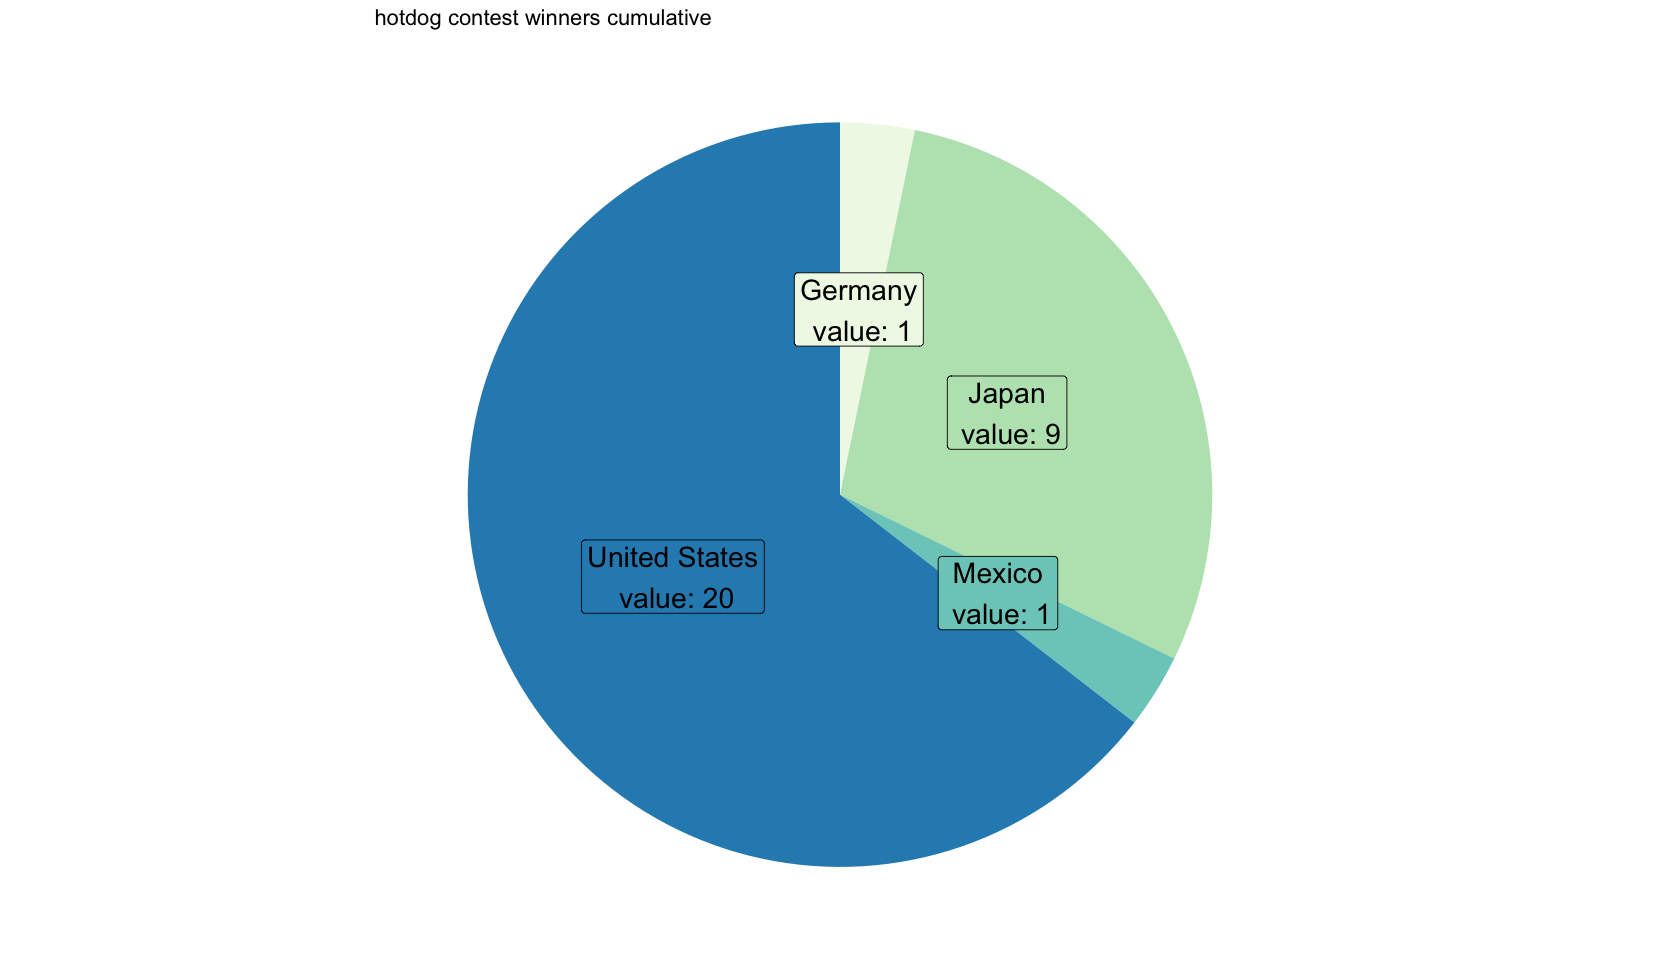

In [85]:
# Compute percentages
my_data1$fraction <- my_data1$n / sum(my_data1$n)

# Compute the cumulative percentages (top of each rectangle)
my_data1$ymax <- cumsum(my_data1$fraction)

# Compute the bottom of each rectangle
my_data1$ymin <- c(0, head(my_data1$ymax, n=-1))

# Compute label position
my_data1$labelPosition <- (my_data1$ymax + my_data1$ymin) / 2

# Compute a good label
my_data1$label <- paste0(my_data1$Country, "\n value: ", my_data1$n)

# Make the plot
ggplot(my_data1, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Country)) +
  geom_rect() +
  geom_label( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  #xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")+
  ggtitle("hotdog contest winners cumulative")

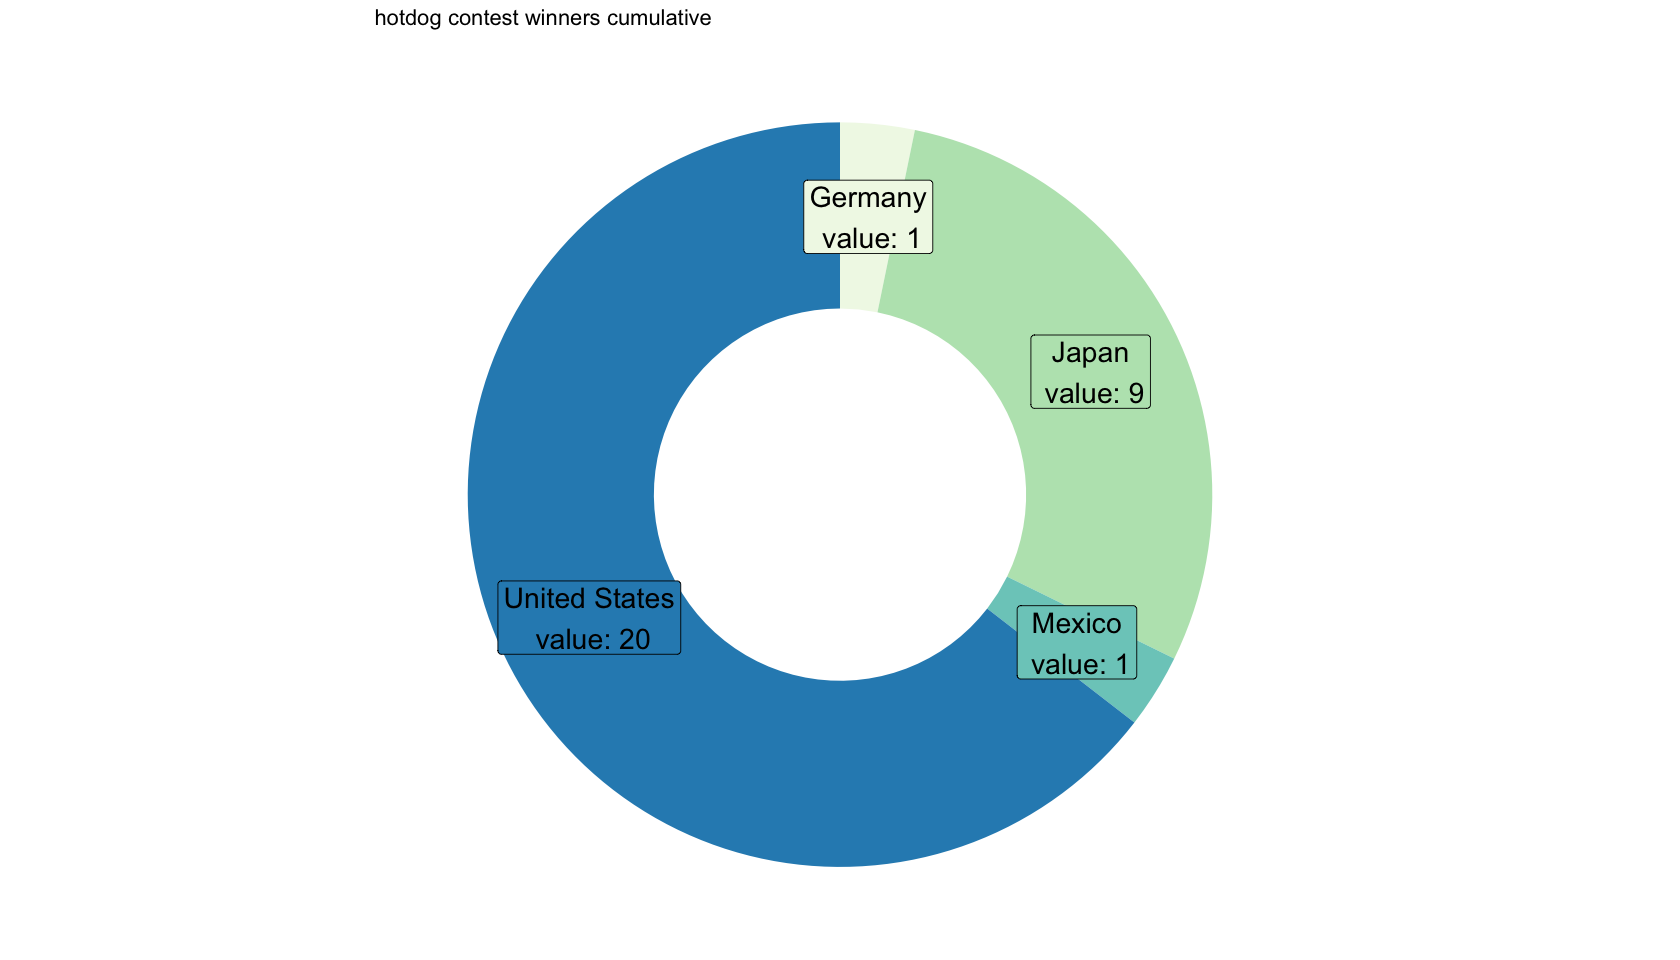

In [86]:
# Compute percentages
my_data1$fraction <- my_data1$n / sum(my_data1$n)

# Compute the cumulative percentages (top of each rectangle)
my_data1$ymax <- cumsum(my_data1$fraction)

# Compute the bottom of each rectangle
my_data1$ymin <- c(0, head(my_data1$ymax, n=-1))

# Compute label position
my_data1$labelPosition <- (my_data1$ymax + my_data1$ymin) / 2

# Compute a good label
my_data1$label <- paste0(my_data1$Country, "\n value: ", my_data1$n)

# Make the plot
ggplot(my_data1, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Country)) +
  geom_rect() +
  geom_label( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none") +
  ggtitle("hotdog contest winners cumulative")